In [156]:
from IPython.display import Image

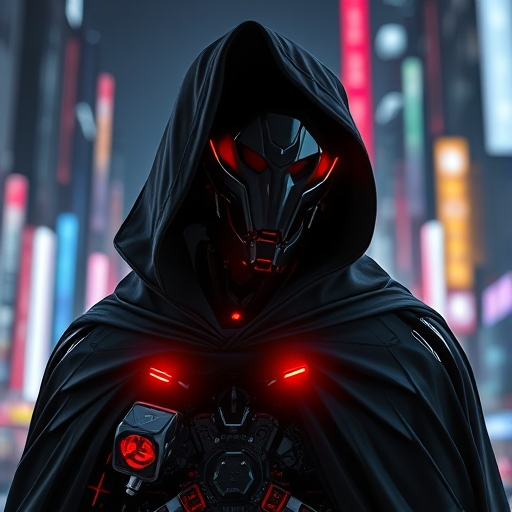

In [159]:
Image(filename = 'SMPRIL.jpeg')

# State Memory-Based Predictive Reinforcement Imitation Learning (SMPRIL) for CASBOT "01".

Author: [Kevin Thomas](mailto:ket189@pitt.edu)

License: [Apache License 2.0](https://github.com/mytechnotalent/SMPRIL/blob/main/LICENSE)

## Introduction

The **New AI CASBOT “01” Humanoid Robot** is equipped with advanced **52-axes tech** and leverages **NVIDIA EDIFY 3D AI tools** to achieve state-of-the-art robotic capabilities. In this notebook, we implement **State Memory-Based Predictive Reinforcement Imitation Learning (SMPRIL)** to train CASBOT for dynamic and complex tasks, such as navigation, manipulation, and human-robot interaction.

### What is SMPRIL?

**SMPRIL** combines the strengths of:
1. **State Memory**: CASBOT uses a memory buffer to store and reference past states, actions, and rewards, enabling it to learn from history.
2. **Predictive Modeling**: A predictive neural network predicts future states based on current states and actions. This allows CASBOT to anticipate outcomes and plan ahead.
3. **Reinforcement Learning (RL)**: CASBOT learns optimal actions through trial and error, aiming to maximize cumulative rewards over time.
4. **Imitation Learning (IL)**: CASBOT learns from expert demonstrations to speed up the learning process and achieve better initial performance.

By combining these techniques, CASBOT can handle complex, real-world scenarios with greater efficiency and accuracy.

---

## CASBOT "01" Features

### 1. **52 Axes Tech**
   - Offers fine-grained control and dexterity for advanced manipulation and movement tasks.

### 2. **NVIDIA EDIFY 3D AI Tools**
   - **Isaac Sim**: Used for simulating environments.
   - **TensorRT**: Optimized inference for deep learning models.
   - **Omniverse**: Provides a real-time 3D simulation environment.

---

## Workflow

1. **State Memory**:
   - Stores past experiences (`state`, `action`, `reward`, `next_state`, `done`) in a memory buffer.
   - Helps CASBOT reference historical data to improve decision-making.
<br>
2. **Predictive Modeling**:
   - A neural network predicts the next state given the current state and action.
   - Allows CASBOT to simulate the outcomes of actions before execution.
<br>
3. **Reinforcement Learning**:
   - CASBOT explores and interacts with the environment to learn optimal policies.
   - Uses Q-learning to optimize actions based on cumulative rewards.
<br>
4. **Imitation Learning**:
   - CASBOT mimics expert demonstrations during initial training, enabling faster and more reliable learning.

---

## Device Support for Portability

This implementation detects and utilizes the best available device:
- **NVIDIA GPU (CUDA)**: Leverages high-performance Tensor Cores for deep learning.
- **Apple GPU (MPS)**: Utilizes Metal Performance Shaders for M3 chips.
- **CPU**: Fallback option when no GPU is available.

---

## Key Components of the Implementation

### 1. **Memory Buffer**
The memory buffer stores past experiences:
- `state`: The robot's current state (e.g., joint angles, sensor readings).
- `action`: The action taken (e.g., move to a new position).
- `reward`: The reward received for the action.
- `next_state`: The resulting state after the action.
- `done`: Whether the task or episode is complete.

This allows CASBOT to learn from previous interactions.

### 2. **Predictive Model**
A neural network predicts:
- **Q-values**: Expected rewards for each possible action in a given state.
- **Next State**: Simulated state resulting from a specific action.

This predictive ability enables CASBOT to anticipate outcomes and avoid suboptimal actions.

### 3. **Reinforcement Learning**
Reinforcement learning uses:
- **Exploration**: Random actions to discover new strategies.
- **Exploitation**: Leveraging known strategies to maximize rewards.

### 4. **Imitation Learning**
Imitation learning initializes CASBOT with expert data, providing a strong foundation and reducing the need for random exploration.

---

## CASBOT Training Workflow

1. **Environment Setup**:
   - Simulate CASBOT's environment using NVIDIA EDIFY tools (e.g., Isaac Sim).
<br>
2. **Memory-Based Learning**:
   - Store experiences in a memory buffer to enable learning from past interactions.
<br>
3. **Predictive and Reinforcement Learning**:
   - Train CASBOT to predict outcomes and optimize actions based on rewards.
<br>
4. **Device-Specific Optimization**:
   - Utilize NVIDIA CUDA for GPUs or Apple MPS for macOS systems with M3 chips.

---

## Advantages of SMPRIL for CASBOT "01"

1. **Efficient Learning**: Combines imitation learning and reinforcement learning for faster training.
2. **Predictive Control**: CASBOT can simulate and anticipate outcomes, reducing errors.
3. **Adaptive Behavior**: State memory enables CASBOT to adapt to dynamic environments.
4. **Portability**: Runs on both NVIDIA GPUs and Apple MPS for broader compatibility.

---

## Summary

This notebook demonstrates how **State Memory-Based Predictive Reinforcement Imitation Learning (SMPRIL)** empowers CASBOT “01” to handle complex tasks with its advanced hardware capabilities and NVIDIA EDIFY 3D AI tools. By integrating memory, predictive modeling, reinforcement learning, and imitation learning, CASBOT achieves robust performance in real-world scenarios.

Run the provided Python code to:
1. Train CASBOT in a simulated environment.
2. Use predictive models for enhanced control.
3. Leverage device-specific optimizations for peak performance.

Explore the power of SMPRIL with CASBOT "01"!

## Prerequisites

In [1]:
!pip install torch torchvision torchaudio

In [2]:
!pip install gym

## Init GPU

In [3]:
import torch

In [4]:
def get_device():
    """
    Function to obtain if a GPU is available and then assign it to the device.
    """
    if torch.cuda.is_available():
        print('NVIDIA GPU detected. Using CUDA.')
        return torch.device('cuda')
    elif torch.backends.mps.is_available():
        print('Apple GPU detected. Using MPS.')
        return torch.device('mps')
    else:
        print('No compatible GPU detected. Using CPU.')
        return torch.device('cpu')

### Set Device

In [5]:
device = get_device()

Apple GPU detected. Using MPS.


## Update the Model and Training to Use Device

In [6]:
import torch.nn as nn

In [139]:
class CASBOTPredictiveModel(nn.Module):
    """
    A neural network model for predictive reinforcement learning with CASBOT.
    """
    
    def __init__(self, state_dim: int, action_dim: int):
        """
        Initializes the CASBOT predictive model.

        Params:
            state_dim: int
            action_dim: int
        """
        super(CASBOTPredictiveModel, self).__init__()
        self.fc1 = nn.Linear(state_dim, 256)  # first hidden layer
        self.fc2 = nn.Linear(256, 128)  # second hidden layer
        self.q_out = nn.Linear(128, action_dim)  # Q-value output for actions
        # linear layer for predicting the future state from state and action
        self.future_state = nn.Linear(state_dim + action_dim, state_dim)

    def forward(self, state: torch.Tensor) -> torch.Tensor:
        """
        Computes Q-values for all possible actions given a state.

        Params:
            state: torch.Tensor

        Returns:
            torch.Tensor
        """
        x = torch.relu(self.fc1(state))  # apply first hidden layer with ReLU activation
        x = torch.relu(self.fc2(x))  # apply second hidden layer with ReLU activation
        return self.q_out(x)  # output Q-values

    def predict_next_state(self, state: torch.Tensor, action: torch.Tensor) -> torch.Tensor:
        """
        Predicts the next state based on the current state and an action.

        Params:
            state: torch.Tensor
            action: torch.Tensor

        Returns:
            torch.Tensor
        """
        # concatenate the state and action tensors along the last dimension
        combined_input = torch.cat((state, action), dim=-1)
        # predict the next state using the combined input
        return self.future_state(combined_input)

## Update the Agent to Use Device

In [140]:
class CASBOTAgent:
    """
    A reinforcement learning agent for controlling the CASBOT robot.
    The agent uses a neural network for Q-value estimation and predictive modeling,
    enabling efficient learning and decision-making.
    """

    def __init__(self, state_dim, action_dim, memory, gamma=0.99, lr=0.001):
        """
        Initializes the CASBOT agent.

        Params:
            state_dim: int
            action_dim: int
            memory: Memory
            gamma: float, optional
            lr: float, optional
        """
        self.model = CASBOTPredictiveModel(state_dim, action_dim).to(device)
        self.target_model = CASBOTPredictiveModel(state_dim, action_dim).to(device)
        self.update_target_network()
        self.memory = memory
        self.gamma = gamma
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.loss_fn = nn.MSELoss()

    def update_target_network(self):
        """
        Updates the weights of the target network to match the main model.
        This helps stabilize training by reducing the correlation between
        the target and the training updates.
        """
        self.target_model.load_state_dict(self.model.state_dict())

    def get_action(self, state, epsilon=0.1):
        """
        Chooses an action using an epsilon-greedy policy.
    
        Params:
            state: np.ndarray
            epsilon: float, optional
    
        Returns:
            int
        """
        if np.random.rand() < epsilon:
            return np.random.randint(0, action_dim)  # Random action
    
        # debug: Log state details
        print(f"get_action received state: {state}, shape: {state.shape}, dtype: {state.dtype}")
    
        # ensure state is a NumPy array
        state = np.array(state, dtype=np.float32)
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)
        with torch.no_grad():
            return self.model(state_tensor).argmax().item()

    def train(self, batch_size=32):
        """
        Train model.

        Params:
            batch_size: int, optional
        """
        if len(self.memory) < batch_size:
            return
    
        batch = self.memory.sample(batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = torch.FloatTensor(states).to(device)
        actions = torch.LongTensor(actions).unsqueeze(1).to(device)  # Ensure actions are 2D
        rewards = torch.FloatTensor(rewards).to(device)
        next_states = torch.FloatTensor(next_states).to(device)
        dones = torch.FloatTensor(dones).to(device)
    
        # one-hot encode actions for future_state
        actions = torch.nn.functional.one_hot(actions.squeeze(-1), num_classes=action_dim).float().to(device)
    
        # Q-value update
        q_values = self.model(states).gather(1, actions.argmax(dim=1, keepdim=True)).squeeze()
        next_q_values = self.target_model(next_states).max(1)[0]
        expected_q_values = rewards + (1 - dones) * self.gamma * next_q_values
    
        # predictive model for state prediction
        predicted_next_states = self.model.predict_next_state(states, actions)
        predictive_loss = self.loss_fn(predicted_next_states, next_states)
    
        # compute combined loss
        loss = self.loss_fn(q_values, expected_q_values) + predictive_loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

## Update the Training Loop to Use Device

In [110]:
import numpy as np

In [111]:
import gym

In [112]:
from gym import spaces

In [141]:
class CASBOTEnvironment(gym.Env):
    """
    A custom Gym environment for simulating the CASBOT robot.
    This environment models the interaction between the agent and the CASBOT robot
    through discrete actions and continuous state observations.
    """
    
    def __init__(self):
        """
        Initializes the CASBOT environment by defining the action and observation spaces.
        """
        super(CASBOTEnvironment, self).__init__()
        
        # define the action space: 5 discrete actions available to the agent
        self.action_space = spaces.Discrete(5)
        
        # define the observation space: 10 continuous state features between -1.0 and 1.0
        self.observation_space = spaces.Box(low=-1.0, high=1.0, shape=(10,), dtype=np.float32)
        
        # initialize internal variables to track the state and whether the episode is done
        self.state = None
        self.done = False

    def reset(self, seed=None, options=None):
        """
        Resets the environment to an initial state.
        This method initializes the state to random continuous values within the observation space range.

        Params:
            seed: int, optional
            options: dict, optional

        Returns:
            tuple
        """
        super().reset(seed=seed)  # set the random seed for reproducibility
        # generate a random state within the observation space
        self.state = np.random.uniform(-1.0, 1.0, size=(10,)).astype(np.float32)
        self.done = False  # reset the done flag to indicate a new episode
        info = {}  # placeholder for any additional information
        print(f'reset state: {self.state}, shape: {self.state.shape}, dtype: {self.state.dtype}')
        return self.state, info
    
    def step(self, action):
        """
        Executes an action in the environment and updates the state.
        This method simulates the environment dynamics by updating the state, calculating a reward,
        and determining whether the episode is terminated or truncated.

        Params:
            action: int

        Returns:
            tuple
        """
        # generate a random reward for the action
        reward = np.random.rand()
        # update the state with a new random value within the observation space
        self.state = np.random.uniform(-1.0, 1.0, size=(10,)).astype(np.float32)
        # determine if the episode is terminated with a 5% chance
        terminated = np.random.rand() > 0.95
        # set truncated to False (not used in this example)
        truncated = False
        # placeholder for any additional information
        info = {}
        print(f'step returned state: {self.state}, shape: {self.state.shape}, dtype: {self.state.dtype}')
        return self.state, reward, terminated, truncated, info

In [142]:
from gym.envs.registration import register

In [143]:
register(
    id='NVIDIA-CASBOT-v1',
    entry_point='__main__:CASBOTEnvironment',  # use '__main__' when defining in a notebook
    max_episode_steps=500
)

In [144]:
env = gym.make('NVIDIA-CASBOT-v1')
print(env)

<TimeLimit<OrderEnforcing<PassiveEnvChecker<CASBOTEnvironment<NVIDIA-CASBOT-v1>>>>>


In [145]:
from gym.envs.registration import registry

In [146]:
list(registry.keys())

['CartPole-v0',
 'CartPole-v1',
 'MountainCar-v0',
 'MountainCarContinuous-v0',
 'Pendulum-v1',
 'Acrobot-v1',
 'LunarLander-v2',
 'LunarLanderContinuous-v2',
 'BipedalWalker-v3',
 'BipedalWalkerHardcore-v3',
 'CarRacing-v2',
 'Blackjack-v1',
 'FrozenLake-v1',
 'FrozenLake8x8-v1',
 'CliffWalking-v0',
 'Taxi-v3',
 'Reacher-v2',
 'Reacher-v4',
 'Pusher-v2',
 'Pusher-v4',
 'InvertedPendulum-v2',
 'InvertedPendulum-v4',
 'InvertedDoublePendulum-v2',
 'InvertedDoublePendulum-v4',
 'HalfCheetah-v2',
 'HalfCheetah-v3',
 'HalfCheetah-v4',
 'Hopper-v2',
 'Hopper-v3',
 'Hopper-v4',
 'Swimmer-v2',
 'Swimmer-v3',
 'Swimmer-v4',
 'Walker2d-v2',
 'Walker2d-v3',
 'Walker2d-v4',
 'Ant-v2',
 'Ant-v3',
 'Ant-v4',
 'Humanoid-v2',
 'Humanoid-v3',
 'Humanoid-v4',
 'HumanoidStandup-v2',
 'HumanoidStandup-v4',
 'NVIDIA-CASBOT-v1']

In [119]:
from collections import deque

In [120]:
import random

In [121]:
import torch.optim as optim

In [122]:
class Memory:
    """
    A simple memory buffer for storing and sampling past experiences.
    """
    def __init__(self, max_size=10000):
        """
        Initializes the memory buffer.

        Params:
            max_size: int, optional
        """
        self.buffer = deque(maxlen=max_size)

    def push(self, state, action, reward, next_state, done):
        """
        Adds an experience to the memory buffer.

        Params:
            state: np.ndarray
            action: int
            reward: float
            next_state: np.ndarray
            done: bool
        """
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        """
        Samples a random batch of experiences from the memory buffer.

        Params:
            batch_size: int

        Returns:
            list
        """
        return random.sample(self.buffer, batch_size)

    def __len__(self):
        """
        Returns the current size of the memory buffer.

        Returns:
            int
        """
        return len(self.buffer)

In [135]:
import logging

In [136]:
import os

In [137]:
import contextlib

In [147]:
# configure minimal logging
logging.basicConfig(level=logging.INFO)  # Only INFO and above will be logged
logger = logging.getLogger(__name__)

# suppress Gym Warnings
gym.logger.set_level(gym.logger.DISABLED)

# create Gym env
env = gym.make('NVIDIA-CASBOT-v1')

# create state and action dim and init memory
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
memory = Memory()

# create agent object
agent = CASBOTAgent(state_dim, action_dim, memory)

# redirect all stdout and stderr to suppress verbose output
with contextlib.redirect_stdout(open(os.devnull, 'w')), contextlib.redirect_stderr(open(os.devnull, 'w')):
    for episode in range(500):
        # initialize environment
        state, _ = env.reset()
        total_reward = 0
        done = False

        # take an action and process the result
        while not done:
            action = agent.get_action(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            memory.push(state, action, reward, next_state, done)
            agent.train(batch_size=64)
            state = next_state
            total_reward += reward

        # print only episode summary
        logger.info(f"Episode {episode}, Total Reward: {total_reward}")

        # update target network periodically
        if episode % 10 == 0:
            agent.update_target_network()

INFO:__main__:Episode 0, Total Reward: 0.16625820860163032
INFO:__main__:Episode 1, Total Reward: 0.5792603339452963
INFO:__main__:Episode 2, Total Reward: 8.867517342813684
INFO:__main__:Episode 3, Total Reward: 19.31451294021334
INFO:__main__:Episode 4, Total Reward: 0.7993525205135067
INFO:__main__:Episode 5, Total Reward: 3.278495189125822
INFO:__main__:Episode 6, Total Reward: 0.7911482403531579
INFO:__main__:Episode 7, Total Reward: 17.228864390402173
INFO:__main__:Episode 8, Total Reward: 4.312042922707515
INFO:__main__:Episode 9, Total Reward: 0.868751156698023
INFO:__main__:Episode 10, Total Reward: 30.90379402175485
INFO:__main__:Episode 11, Total Reward: 4.727897855313576
INFO:__main__:Episode 12, Total Reward: 2.8015394523921118
INFO:__main__:Episode 13, Total Reward: 3.23301796700322
INFO:__main__:Episode 14, Total Reward: 4.6373937124670865
INFO:__main__:Episode 15, Total Reward: 2.935659964264641
INFO:__main__:Episode 16, Total Reward: 4.330096416794188
INFO:__main__:Epi

## Final Analysis
* This output provides a detailed log of the total reward achieved by the agent for each of the 500 episodes in a reinforcement learning environment. Each episode represents a single run of the agent interacting with the environment until a termination condition (e.g., completing a task or reaching a maximum time limit) is met. The “Total Reward” metric aggregates all rewards collected by the agent throughout the episode, serving as a measure of performance for that episode. Higher rewards generally indicate better performance, suggesting the agent is learning and improving its ability to select actions that maximize rewards over time.
* Looking at the results, the total rewards exhibit considerable variability across episodes. Some episodes show very high rewards (e.g., Episode 473 with 64.7 and Episode 474 with 39.5), indicating that the agent performed well in those instances. On the other hand, episodes with low rewards (e.g., Episode 477 with 0.11) suggest suboptimal performance or challenging scenarios within the environment. This variability is common in reinforcement learning, especially during early training phases, as the agent explores various actions and learns an optimal policy through trial and error.
* The presence of episodes with exceptionally high rewards later in the sequence (e.g., Episodes 473 and 494) could indicate that the agent is beginning to exploit its learned policy effectively. However, the continued presence of low-reward episodes suggests room for further improvement in policy consistency. Overall, this log demonstrates the incremental progress of a reinforcement learning agent, characterized by the oscillation between exploration (trying new actions) and exploitation (choosing actions based on learned knowledge). A deeper analysis of reward trends over time, combined with exploration-exploitation metrics, could provide further insights into the agent’s learning dynamics.